In [ ]:
import numpy as np
import pandas as pd

# Funciones de activación
def linear(z, derivate=False):
    if derivate:
        da = np.ones(z.shape)
        return z, da
    else:
        return z

def sigmoid(z, derivate=False):
    a = 1 / (1 + np.exp(-z))
    if derivate:
        da = a * (1 - a) 
        return a, da
    return a

def tanh(z, derivate=False):
    a = np.tanh(z)
    if derivate:
        da = (1 + a) * (1 - a)
        return a, da
    return a

def relu(z, derivate=False):
    a = z * (z >= 0)
    if derivate:
        da = np.array(z >= 0, dtype=float) 
        return a, da
    return a
    

class OLnetwork:
    def __init__(self, n_input, n_output, act_func, learning_rate=0.1):
        self.eta = learning_rate
        self.w = 1 - 2 * np.random.rand(n_output, n_input)
        self.b = 1 - 2 * np.random.rand(n_output, 1)
        self.f = act_func
        
    def predict(self, X):
        Z = np.dot(self.w, X) + self.b
        Yest = self.f(Z)
        return Yest
    
    def fit(self, X, Y, epochs=50):
        #Calcular número de muestras
        p = X.shape[1]
        
        # Iterar por cada época
        for _ in range(epochs):
            # Iterar por cada muestra
            for i in range(p):
                
                # Sacar muestra
                x = X[:,i].reshape(-1, 1)
                y = Y[:,i].reshape(-1, 1) 
                
                # Propagar muestra
                Z = np.dot(self.w, x) + self.b
                Yest, dy = self.f(Z, derivate=True)
        
                #Entrenar
                lg = (y-Yest) * dy
                self.w += self.eta * np.dot(lg, x.T)
                self.b += self.eta * lg

In [ ]:
def plot_data(X, Y, net):
    import matplotlib.pyplot as plt
    dot_c = ('r.', 'g.', 'b.', 'k.')
    lin_c = ('r-', 'g-', 'b-', 'k-')
    for i in range(X.shape[1]):
        c = np.argmax(Y[:,i])
        plt.plot(X[0,i], X[1,i], dot_c[c])
    
    for i in range(4):    
        w1, w2, b = net.w[i,0], net.w[i,1], net.b[i]
        plt.plot([-0, 1],[(-b/w2),(1/w2)*(-w1-b)], lin_c[i])   
    
    plt.xlim([0,1])
    plt.ylim([0,1])

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset_A03.csv to Dataset_A03.csv


In [ ]:
df = pd.read_csv('Dataset_A03.csv')

In [ ]:
X1 = np.asanyarray(df.drop(columns=['y'])).T
Y1 = np.asanyarray(df.drop(columns=['y1','y2','y3','y4'])).T
print(X.shape)
print(Y.shape)


(2, 160)
(4, 160)


In [ ]:
net = OLnetwork(2,4,sigmoid)
net.fit(X,Y, epochs=1000)

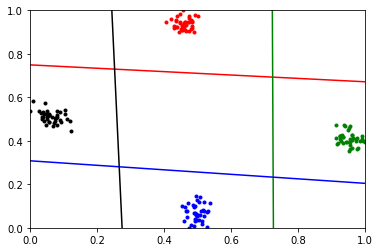

In [ ]:
plot_data(X, Y, net)